The technical name for this is WSR-88D. This stands for Weather Surveillance Radar. NEXRAD uses this to detect precipitation, wind, and atmospheric movement. It then returns the data and displays it in a mosaic map after the data is processed, which in turn shows its movements and precipitation patterns.

In [1]:
#reading the data into pyart
import pyart
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
print(pyart.__version__)
filename = './Downloads/KLOT20130417_235520_V06.gz'
radar = pyart.io.read('./Downloads/KLOT20130417_235520_V06.gz')

C:\Users\Andrew\Anaconda3\lib\site-packages\pyart\map\grid_mapper.py:40: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  from .ball_tree import BallTree
C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
C:\Users\Andrew\Anaconda3\lib\site-packages\ipykernel\pylab\config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figu

1.6.0


In [2]:
dir(radar)

C:\Users\Andrew\Anaconda3\lib\site-packages\IPython\core\formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
C:\Users\Andrew\Anaconda3\lib\site-packages\IPython\core\formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_sweep_in_range',
 '_dic_info',
 'add_field',
 'add_field_like',
 'altitude',
 'altitude_agl',
 'antenna_transition',
 'azimuth',
 'check_field_exists',
 'drift',
 'elevation',
 'extract_sweeps',
 'fields',
 'fixed_angle',
 'gate_altitude',
 'gate_latitude',
 'gate_longitude',
 'gate_x',
 'gate_y',
 'gate_z',
 'georefs_applied',
 'get_azimuth',
 'get_elevation',
 'get_end',
 'get_field',
 'get_gate_x_y_z',
 'get_nyquist_vel',
 'get_slice',
 'get_start',
 'get_start_end',
 'heading',
 'info',
 'init_gate_altitude',
 'init_gate_longitude_latitude',
 'init_gate_x_y_z',
 'init_rays_per_sweep',
 'instrument_parameters',
 'iter_azimuth',
 'it

In [31]:
#in this and the next cell, determining the UTC and local time for the data
radar.time


{'calendar': 'gregorian',
 'comment': 'Coordinate variable for time. Time at the center of each ray, in fractional seconds since the global variable time_coverage_start',
 'data': array([   0.988,    1.011,    1.036, ...,  251.014,  251.049,  251.08 ]),
 'long_name': 'time_in_seconds_since_volume_start',
 'standard_name': 'time',
 'units': 'seconds since 2013-04-17T23:55:20Z'}

In [40]:
import radar
radar.random_datetime()

datetime.datetime(2013, 11, 4, 0, 5, 25)

In [41]:
import datetime
import radar
radar.random_date()
start = datetime.datetime(year=2013, month=4, day=17),
stop = datetime.datetime(year=2013, month=4, day=17)

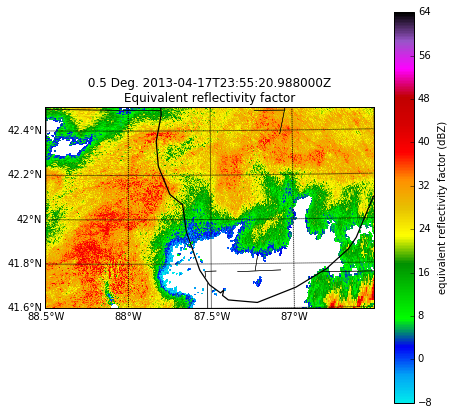

In [64]:
#plotting radar reflectivity factor using this PPI plot 
f = plt.figure(figsize = [25, 7])
plt.subplot(1, 3, 2) 
display.plot_ppi_map('reflectivity', max_lat = 42.5, min_lat =41.6, min_lon = -88.5, max_lon = -86.5,
                     vmin = -8, vmax = 64, lat_lines = np.arange(40, 45, .2), lon_lines = np.arange(-92, -79, .5),
                     resolution = 'i')

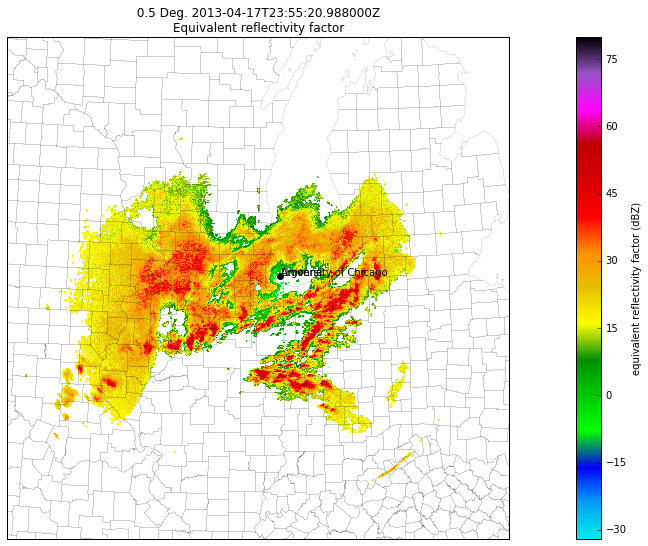

In [72]:
#using RadarMapDisplay, plotting a map of chicago and shoreline with counties visible
nexrad_site = 'klot'
f = plt.figure(figsize = [24,9])
display = pyart.graph.RadarMapDisplay(radar)
display.plot_ppi_map(
    'reflectivity', vmin=-32, vmax=80, cmap='pyart_NWSRef',
    resolution='i', embelish=False)
display.basemap.drawcounties()
display.plot_point(lon=-87.5987, lat=41.7886, symbol='ko', label_text='University of Chicago', label_offset=(None, None))
display.plot_point(lon=-87.5987, lat=41.7886, symbol='ko', label_text='Argonne', label_offset=(None, None))

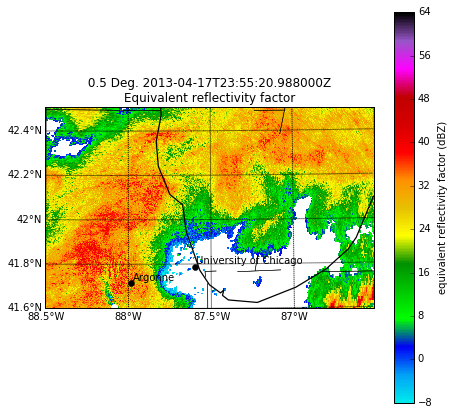

In [65]:
#same PPI plot, but with Argonne and UofC visible in the plot as well
f = plt.figure(figsize = [25, 7])
plt.subplot(1, 3, 2) 
display.plot_ppi_map('reflectivity', max_lat = 42.5, min_lat =41.6, min_lon = -88.5, max_lon = -86.5,
                     vmin = -8, vmax = 64, lat_lines = np.arange(40, 45, .2), lon_lines = np.arange(-92, -79, .5),
                     resolution = 'i') 
display.plot_point(-87.5987, 41.7886, symbol='ko', label_text="University of Chicago", label_offset=(None, None))
display.plot_point(-87.9819, 41.7137, symbol='ko', label_text="Argonne", label_offset=(None, None))